In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Example with OWID CSV
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
# Keep relevant columns
df = df[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'population', 'continent']]

# Remove rows with null values in critical columns
df = df.dropna(subset=['total_cases', 'total_deaths'])

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

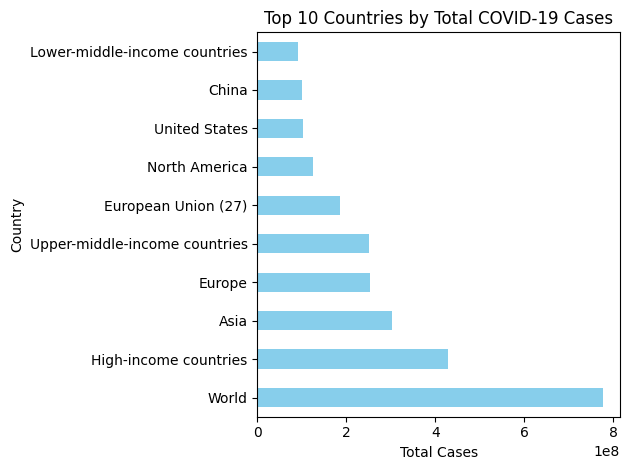

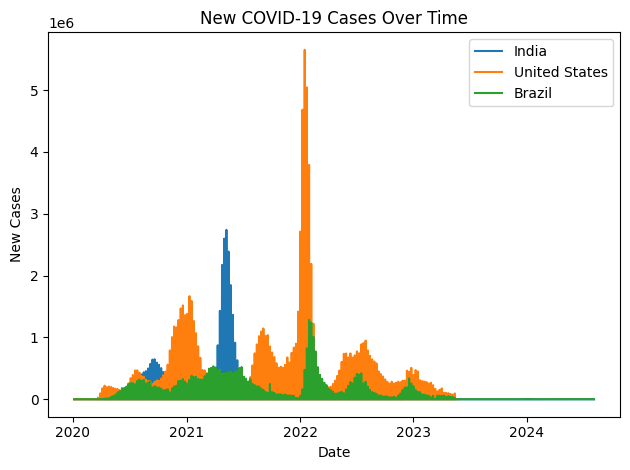

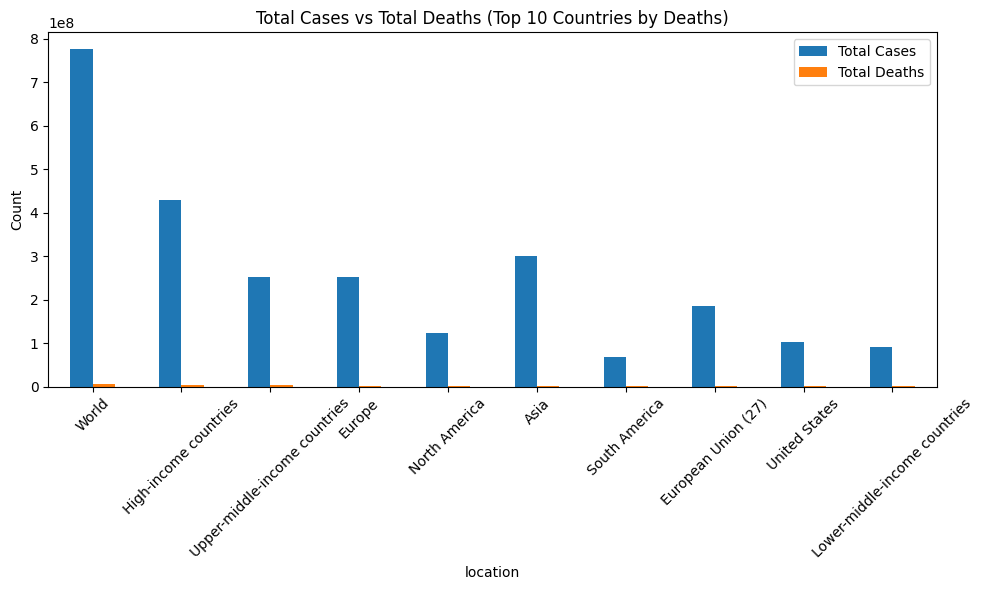

In [5]:
latest = df[df['date'] == df['date'].max()]
top_10 = latest.groupby('location')['total_cases'].max().nlargest(10)

top_10.plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

countries = ['India', 'United States', 'Brazil']
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title('New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()


# Top 10 countries by total deaths
deaths = latest.groupby('location')['total_deaths'].max().nlargest(10)
cases = latest.groupby('location')['total_cases'].max().loc[deaths.index]

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Total Cases': cases,
    'Total Deaths': deaths
})

comparison_df.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Total Cases vs Total Deaths (Top 10 Countries by Deaths)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



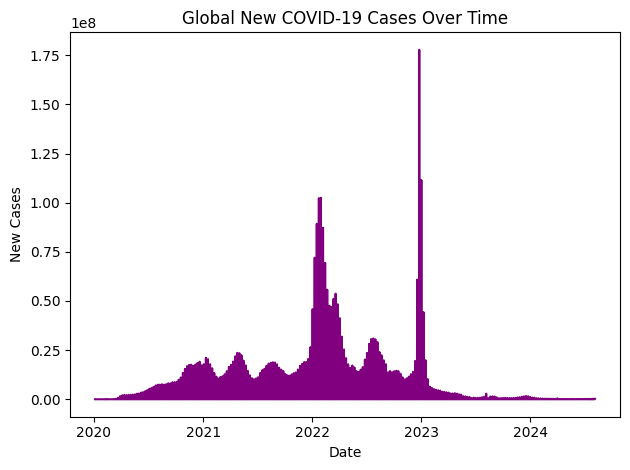

In [6]:
# Daily cases summed globally
global_daily = df.groupby('date')['new_cases'].sum()

plt.plot(global_daily.index, global_daily.values, color='purple')
plt.title('Global New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.tight_layout()
plt.show()

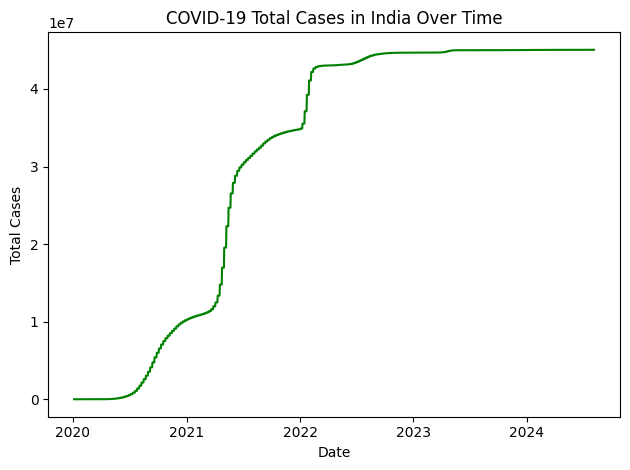

In [7]:
india = df[df['location'] == 'India']
plt.plot(india['date'], india['total_cases'], color='green')
plt.title('COVID-19 Total Cases in India Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

In [8]:
df['death_rate'] = (df['total_deaths'] / df['total_cases']) * 100
# View death rate for India
df[df['location'] == 'India'][['date', 'death_rate']].tail()

,date,death_rate
175218,2024-07-31,1.184738
175219,2024-08-01,1.184738
175220,2024-08-02,1.184738
175221,2024-08-03,1.184738
175222,2024-08-04,1.184730
